# Lab 2: Semantic Link


## Step 1: Setup your notebook

### Select Lakehouse
First, add the Lakehouse you created from the prior lab exercise.

![image-alt-text](https://synapseaisolutionsa.blob.core.windows.net/public/Fabric-Conference/add-lakehouse.png)

### Select environment or install within session
![Select Environment and then select your environment from the list](https://synapseaisolutionsa.blob.core.windows.net/public/Fabric-Conference/AttachEnv.png)

In [1]:
# Install the library or use the myEnv created from earlier
# %pip install semantic-link

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 5, Finished, Available)

In [2]:
# make sure we can use %%dax
%load_ext sempy

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 6, Finished, Available)

## Step 2: Import Semantic Link

Semantic link is a feature that allows you to establish a connection between semantic models and Synapse Data Science in Microsoft Fabric.

![Overview of semantic link](https://learn.microsoft.com/en-us/fabric/data-science/media/semantic-link-overview/data-flow-with-semantic-link.png)

With semantic link, you can use semantic models from Power BI in the Data Science experience to perform tasks such as in-depth statistical analysis and predictive modeling with machine learning techniques. The output of your data science work can be stored in OneLake using Apache Spark and ingested into Power BI using Direct Lake.

You can learn more about Semantic Link functions using [What is semantic link?](https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview).

In [3]:
import sempy.fabric as fabric
from sempy.relationships import plot_relationship_metadata
from sempy.fabric._client._tools import import_pbix_sample

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 7, Finished, Available)

## Step 3: Let's explore our model

In [4]:
# Load our Churn dataset - a PBIX sample has been pre-configured with the relationships and semantic info
dataset = 'Churn'
import_pbix_sample([dataset])

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 8, Finished, Available)

Power BI semantic model 'Churn' already exists, skipping: 100%|██████████| 1/1 [00:00<00:00, 2109.81it/s]


StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 9, Finished, Available)

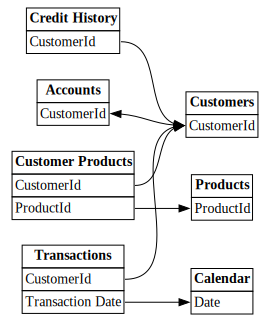

In [5]:
df_relationships = fabric.list_relationships(dataset)
plot_relationship_metadata(df_relationships)

In [6]:
fabric.list_measures(dataset)

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 10, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description
0,Customer Products,Number Of Products,COUNTROWS('Customer Products'),Int64,False,,
1,Credit History,Last Credit Score,"MAXX(\n TOPN(\n 1,\n 'Credit ...",Int64,False,,
2,Transactions,Balance,SUM(Transactions[Amount]),Decimal,False,,


StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 11, Finished, Available)

<Axes: xlabel='Geography'>

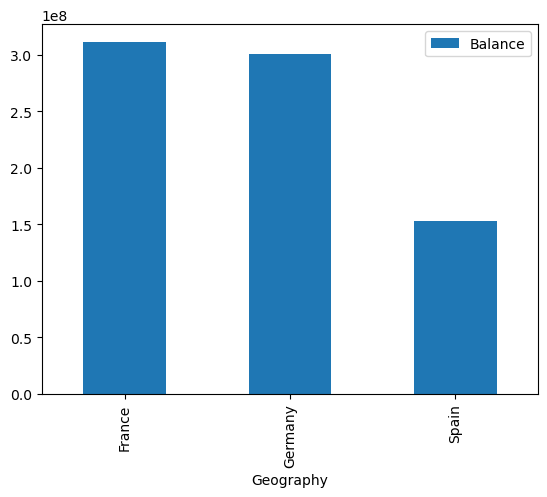

In [7]:
# Outstanding balances per country

df_balance_by_geography = fabric.evaluate_measure(
    dataset,
    ["Balance"],
    ["Customers[Geography]"])

df_balance_by_geography.set_index('Geography').plot.bar()

In [8]:
df_measures = fabric.evaluate_measure(
    dataset,
    ["Number Of Products", "Last Credit Score", "Balance"],
    ["Customers[CustomerId]"])

df_measures


StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 12, Finished, Available)

,CustomerId,Number Of Products,Last Credit Score,Balance
0,15565701,1,698,161993.89
1,15565706,1,612,0.0
2,15565714,2,601,64430.06
3,15565779,1,627,57809.32
4,15565796,1,745,96048.55
...,...,...,...,...
9995,15815628,1,711,113899.92
9996,15815645,2,481,152303.66
9997,15815656,1,541,100116.67
9998,15815660,1,758,154139.45


In [9]:
df_customer = fabric.read_table(dataset, "Customers")
df_customer

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 13, Finished, Available)

,CustomerId,Surname,Geography,Gender,Age,Tenure,Has Credit Card,Is Active
0,15592531,Bartlett,France,Male,50,7,No,Yes
1,15706552,Odinakachukwu,France,Male,36,7,Yes,Yes
2,15717426,Armstrong,France,Male,36,7,No,Yes
3,15731511,Ritchie,France,Male,45,7,Yes,No
4,15724944,Tien,France,Male,34,7,No,Yes
...,...,...,...,...,...,...,...,...
9995,15584812,Overby,Spain,Female,39,0,Yes,No
9996,15643523,Power,Spain,Female,30,10,No,No
9997,15691170,Vasilyeva,Spain,Female,29,10,No,Yes
9998,15762708,Chiemezie,Spain,Female,38,10,No,Yes


In [10]:
df_account = fabric.read_table(dataset, "Accounts")
df_account

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 14, Finished, Available)

,CustomerId,EstimatedSalary,Exited,AccountId
0,15647311,112542.58,False,1
1,15701354,93826.63,False,3
2,15737888,79084.1,False,4
3,15592531,10062.8,False,6
4,15792365,74940.5,False,8
...,...,...,...,...
9995,15672754,53445.17,True,9981
9996,15768163,115146.4,True,9982
9997,15769959,69384.71,True,9991
9998,15584532,42085.58,True,9997


In [11]:
# merge all data
df_churn = df_customer.merge(df_measures).merge(df_account)
df_churn

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 15, Finished, Available)

,CustomerId,Surname,Geography,Gender,Age,Tenure,Has Credit Card,Is Active,Number Of Products,Last Credit Score,Balance,EstimatedSalary,Exited,AccountId
0,15592531,Bartlett,France,Male,50,7,No,Yes,2,822,0.0,10062.8,False,6
1,15706552,Odinakachukwu,France,Male,36,7,Yes,Yes,1,533,85311.7,156731.91,False,31
2,15717426,Armstrong,France,Male,36,7,No,Yes,1,850,0.0,40812.9,False,38
3,15731511,Ritchie,France,Male,45,7,Yes,No,2,808,118626.55,147132.46,False,91
4,15724944,Tien,France,Male,34,7,No,Yes,2,663,0.0,180427.24,False,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15584812,Overby,Spain,Female,39,0,Yes,No,2,693,0.0,81901.6,False,9427
9996,15643523,Power,Spain,Female,30,10,No,No,2,710,0.0,19500.1,False,9569
9997,15691170,Vasilyeva,Spain,Female,29,10,No,Yes,1,590,99250.08,129629.41,False,9813
9998,15762708,Chiemezie,Spain,Female,38,10,No,Yes,1,619,119658.49,8646.58,False,9848


Semantic data frames provide convenience methods to write data to a lakehouse.

In [13]:
df_churn.to_lakehouse_table('ChurnFromSemanticLink')

StatementMeta(, f7222f9c-c8ff-44ea-9769-301da6d7ac40, 17, Finished, Available)

# Exercise 1: Analyze data with Pandas plots

You can learn more about how to use plotting functions in Pandas using [this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

In this exercise, you will:
- Plot the average credit score by geography and tenure.
- Analyze the impact on tenure based on geography.

To do this, you will:
1. TODO: Generate a code snippet that creates `df_credit_score_by_geo_tenure`. To do this, start with the DataFrame named `df_churn`. Then, follow these steps:
   * **Group the data** by the 'Geography' and 'Tenure' columns. This is done using the `groupby` method. *Hint:* By setting `as_index=False`, you ensure that the grouping columns are not used as the index in the resulting DataFrame.
   * **Calculate the mean** of the 'Last Credit Score' for each group. This is achieved by selecting the 'Last Credit Score' column and applying the `mean` function.
   * **Pivot the result** to reformat the data so that 'Tenure' becomes the index, 'Geography' becomes the column labels, and the values are the mean 'Last Credit Score'. This is done using the `pivot` method, where `index='Tenure'`, `columns='Geography'`, and `values='Last Credit Score'`.
1. Plot the dataframe as a bar chart. This step is provided below.
1. Customize the bar chart to visualize credit scores above or below a common average (e.g. using the bottom argument). This step is provided below.


In [ ]:
# Modify this code using the instructions above
df_credit_score_by_geo_tenure = # Complete

# Do not change this code
baseline = 650

(df_credit_score_by_geo_tenure - baseline).plot.bar(bottom=baseline) 

# Exercise 2: Leverage DAX for computations

Repeat the exercise 1, but this time perform the computation using DAX.

In this exercise, you will do the following:
1. Add the appropriate DAX query to compute the average credit score per Geography per Tenure. You can use the ```%%dax``` notebook magic to experiment within the notebook.
1. Pivot the data using Pandas to get a dataframe like this:

    ![image-alt-text](https://synapseaisolutionsa.blob.core.windows.net/public/Fabric-Conference/semantic-link-pivot-df.png)

In [ ]:
%%dax Churn

# Write DAX Query here

In [ ]:
df = fabric.evaluate_dax(dataset, 
"""
UPDATE WITH DAX QUERY ABOVE
)
""")

df.head()

In [ ]:
df.pivot(index='Customers[Tenure]', columns='Customers[Geography]', values='[Average Credit Score]')